Name Sarah Brannum

Labpartner(s) N/A (at Sci Comm Summit)

In [1]:
#import statements go here
import pandas as pd
import numpy as np

# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [4]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [75]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [76]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [77]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [78]:
u_euler

array([[ 1.00000000e+01,  2.00000000e+00],
       [ 1.07600000e+01,  2.12000000e+00],
       [ 1.15622656e+01,  2.26331200e+00],
       ...,
       [-9.20026807e-03,  1.46777295e-08],
       [-1.01202949e-02,  1.40892699e-08],
       [-1.11323244e-02,  1.35242733e-08]])

We will now plot the variation of population for each species with time.

In [79]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

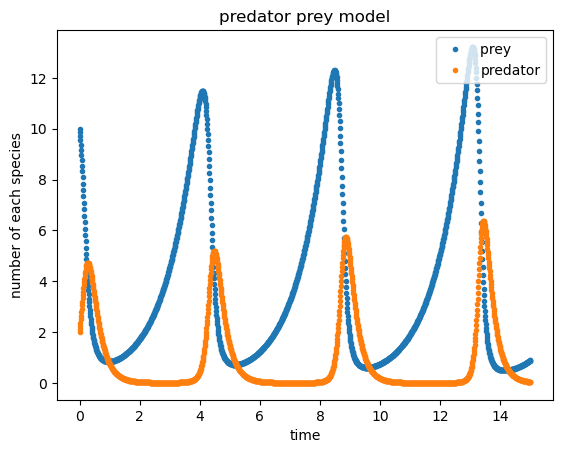

In [11]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Let's think a bit about what this solution means, what is going on here?

Answer: The population of prey increases as a predator population decreases. However, the increase in prey leads to a delayed increase in predators. This oscillatory pattern can continue forever.

What happens if we start with different initial conditions? Like more prey and less predators.

Answer: If we have more prey and less predators, the population of prey will not decrease as low after each spike in predators. Similarly, if there were more predators and less prey, the prey population would decrease even more, or possibly become extinct as there would be none left. However, the amount of predators would reduce as well since there would not be enough prey for their large population.

What happened?

Text(0.5, 1.0, 'predator prey model -- more prey less predators')

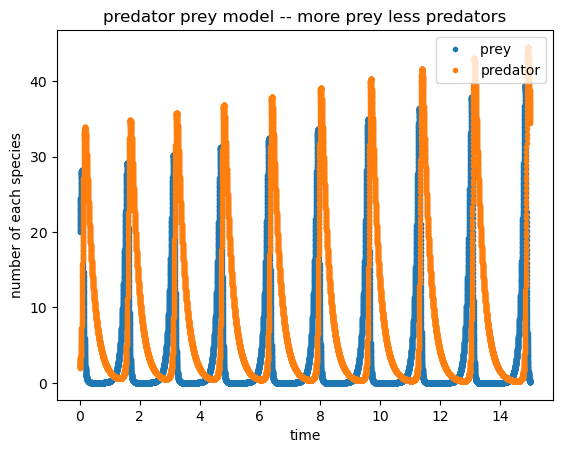

In [74]:
# code to test the prediction:

# initial conditions (initial populations):
x0 = 20. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- more prey less predators")

As predicted, we see larger spikes in both prey and predator populations. However the population of prey still reduces to 0 after each spike in predators.

What if we start with the same amount of prey and predators?

Text(0.5, 1.0, 'predator prey model -- same prey and predators')

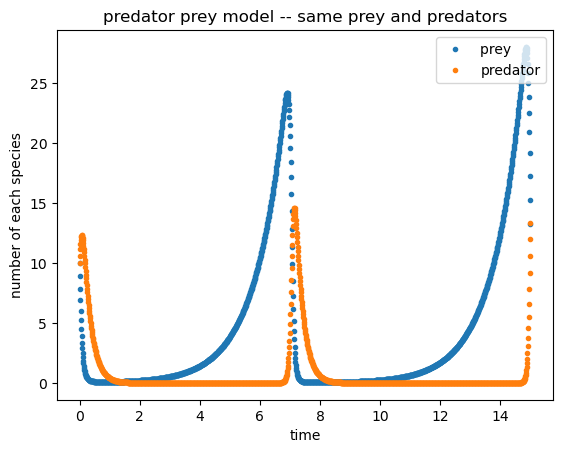

In [13]:
# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 10. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- same prey and predators")

What happened?

Both populations see a plummet in population at the beginning of the simulation. Both populations saw an increase in their overall population over the course of the simulation. The same delayed peak between the prey and predator population is still apparent.

Let's mess around with the model parameters. What if the prey grow faster?

Text(0.5, 1.0, 'predator prey model -- higher prey growth rate')

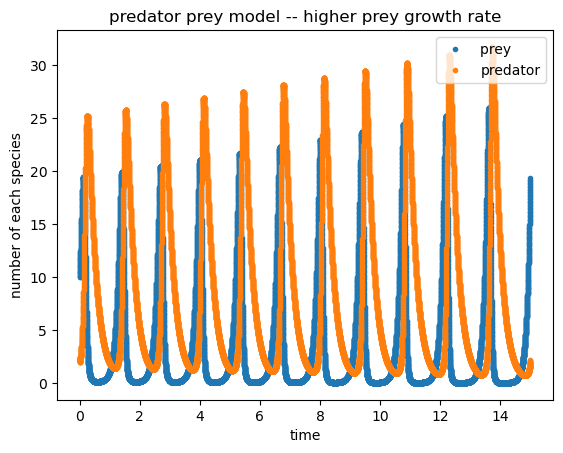

In [72]:
# set the parameters
alpha = 10. #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- higher prey growth rate")


What happened?

With the higher prey growth rate, both populations saw more oscillations of their population. There were 5 peaks during the simluation. Howeber, both populations at the end saw an eventual die-off since the population of predators became too high. Both populations saw dramatic increases in their populations.

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

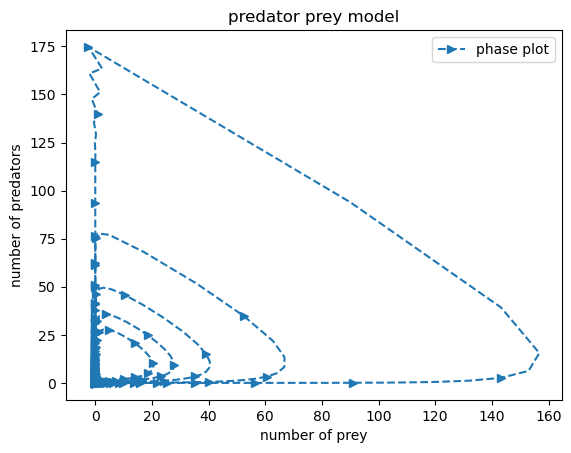

In [80]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

Text(0.5, 1.0, 'predator prey model -- bigger time step')

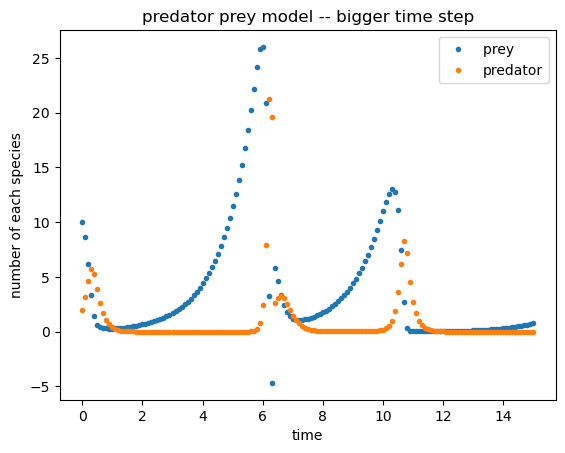

In [17]:
# set the parameters
alpha = 1. #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- bigger time step")

With the bigger time step, the the number of each species increases faster over timee. Also, the number of peaks decreases.

Text(0.5, 1.0, 'predator prey model -- smaller time step')

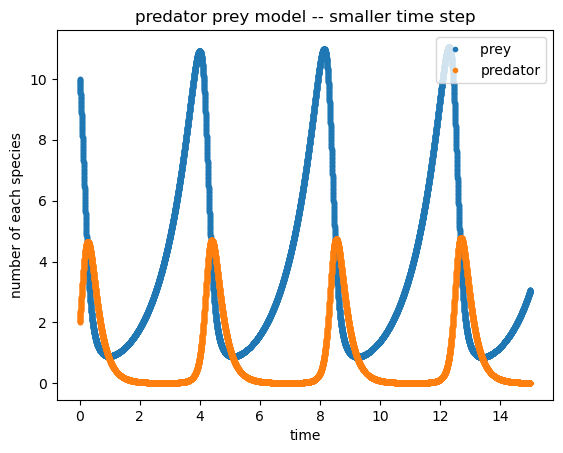

In [18]:
# set the parameters
alpha = 1. #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment (default=0.01)
N  = int(T/dt) + 1                  # number of time-steps

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- smaller time step")

With the smaller time step, the number of peaks his higher, but they peak at lower values. 

#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



0.02656621992118602
8.98


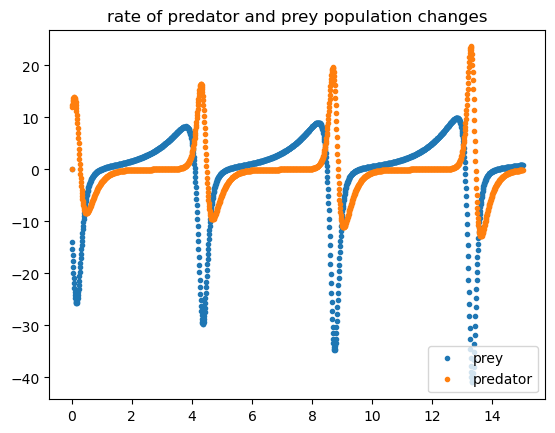

In [90]:
# calculate the rate of population change over time

# initialize the array containing the solution for each time-step
population_growth_rate = np.zeros((N, 2))
#change in population/change in time
for n in range(N-1):
    population_growth_rate[n+1] = (u_euler[n+1]-u_euler[n])/dt

# find the times when the rates are identical (or close by)
population_growth_rate_differences=np.absolute(population_growth_rate[:,0]-population_growth_rate[:,1])
min_difference=0
for n in range(len(population_growth_rate_differences)):
    difference=np.absolute(population_growth_rate[n,0]-population_growth_rate[n,1])
    if n==0:
        continue
    if n==1:
        min_difference=np.absolute(0-difference)
        index_time=n
    if np.absolute(0-difference)<min_difference:
        min_difference=difference
        index_time=n
print(min_difference) #how close to 0 the values are
print(index_time*dt) #time step where 0 occurs


#print(population_growth_rate)
plt.plot(time, population_growth_rate[:,0], '.', label = 'prey')
plt.plot(time, population_growth_rate[:,1], '.', label = 'predator')
plt.title('rate of predator and prey population changes')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'predator prey model with fixed points of steady state')

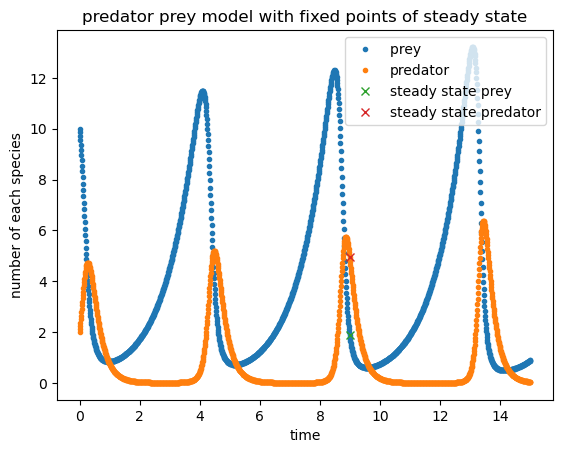

In [91]:
# same plotting but including the steady state population values

# set the parameters
alpha = 1. #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment (default=0.01)
N  = int(T/dt) + 1                  # number of time-steps

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# calculate population growth rate for each step and 

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot(time[index_time],u_euler[index_time,0], 'x',label='steady state prey')
plt.plot(time[index_time],u_euler[index_time,1], 'x',label='steady state predator')

plt.legend(loc='upper right')

plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model with fixed points of steady state")

Text(0.5, 1.0, 'predator prey model')

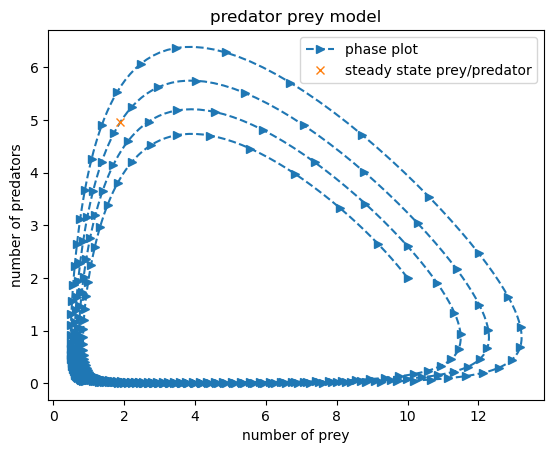

In [94]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(u_euler[index_time,0],u_euler[index_time,1], 'x',label='steady state prey/predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [95]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

Text(0.5, 1.0, 'predator prey model with RK4 model, dt=0.01')

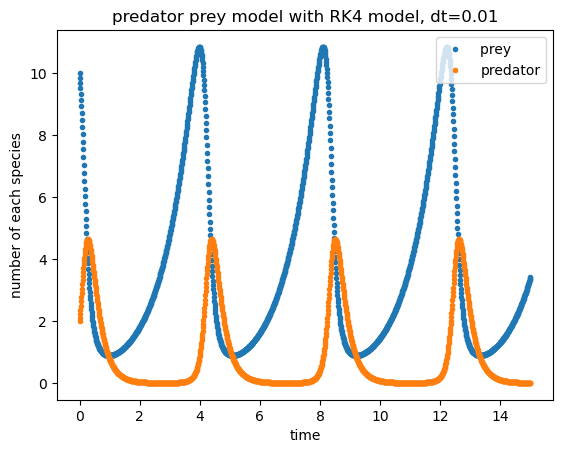

In [98]:
# set the parameters
alpha = 1. #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment (default=0.01)
N  = int(T/dt) + 1                  # number of time-steps

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

# calculate population growth rate for each step and 

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
#plt.plot(time[index_time],u_euler[index_time,0], 'x',label='steady state prey')
#plt.plot(time[index_time],u_euler[index_time,1], 'x',label='steady state predator')

plt.legend(loc='upper right')

plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model with RK4 model, dt=0.01")

Text(0.5, 1.0, 'predator prey model with RK4 model, dt=0.001')

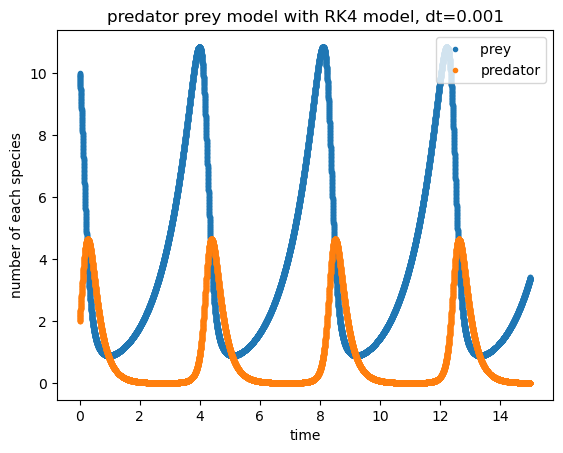

In [99]:
# RK4 model with smaller dt
# set the parameters
alpha = 1. #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment (default=0.01)
N  = int(T/dt) + 1                  # number of time-steps

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

# calculate population growth rate for each step and 

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
#plt.plot(time[index_time],u_euler[index_time,0], 'x',label='steady state prey')
#plt.plot(time[index_time],u_euler[index_time,1], 'x',label='steady state predator')

plt.legend(loc='upper right')

plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model with RK4 model, dt=0.001")

The dt decreasing to smaller time steps does not have majorly impact the RK4 predator prey model compared to the Eulerian model. There are limited differences in the locations and magnitudes of the peaks. However, the number of points is higher with a lower dt, since the smaller time steps create longer time series.

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

Text(0.5, 1.0, 'predator prey model -- lower alpha')

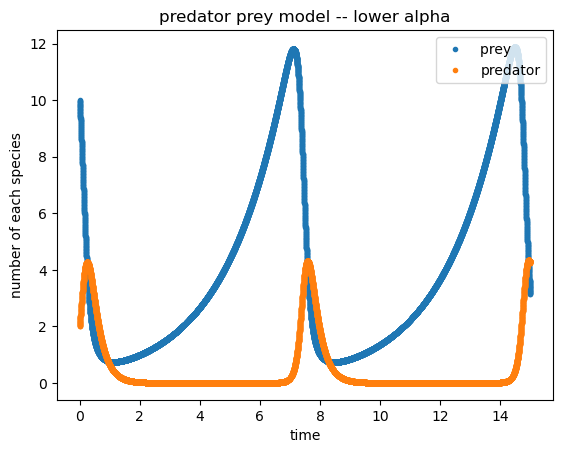

In [105]:
# changing alpha
# set the parameters
alpha = 0.5  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- lower alpha")

Text(0.5, 1.0, 'predator prey model -- higher alpha')

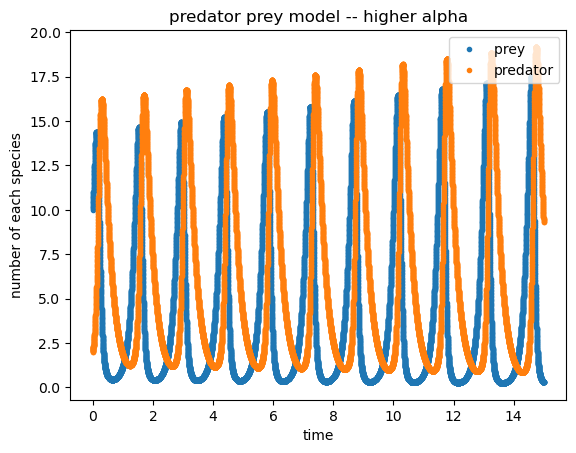

In [109]:
# changing alpha
# set the parameters
alpha = 7  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- higher alpha")

Having the lower alpha decreases the amount of peaks in populations of prey and predators. Having a higher alpha increases the amount of peaks

Text(0.5, 1.0, 'predator prey model -- higher beta')

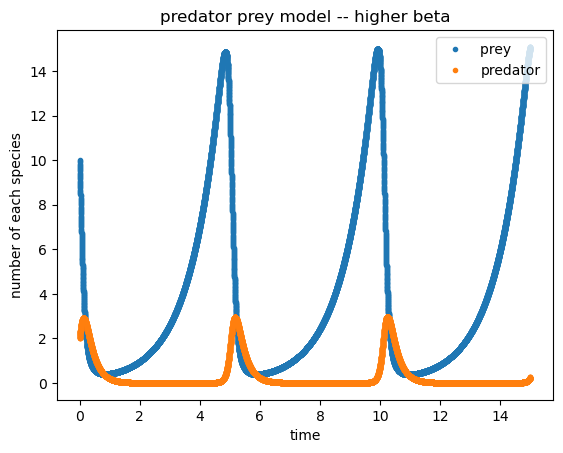

In [106]:
# changing beta
# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 3 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- higher beta")

Text(0.5, 1.0, 'predator prey model -- lower beta')

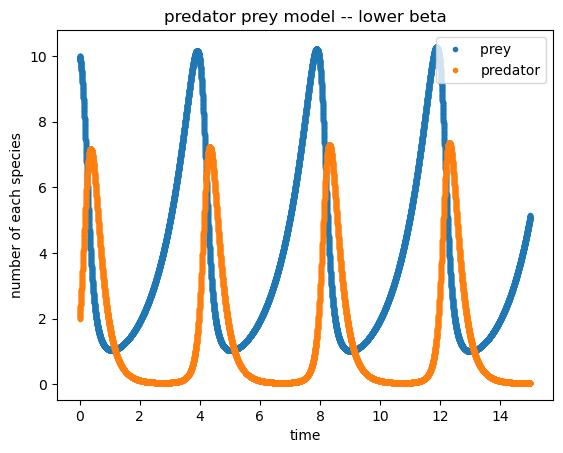

In [108]:
# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 0.7 #prey
gamma = 4. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- lower beta")

The beta parameters controls the mangitude of thee predator peaks. A higher beta creates lower peaks, while a lower beta creates higher peaks.

Text(0.5, 1.0, 'predator prey model -- higher gamma')

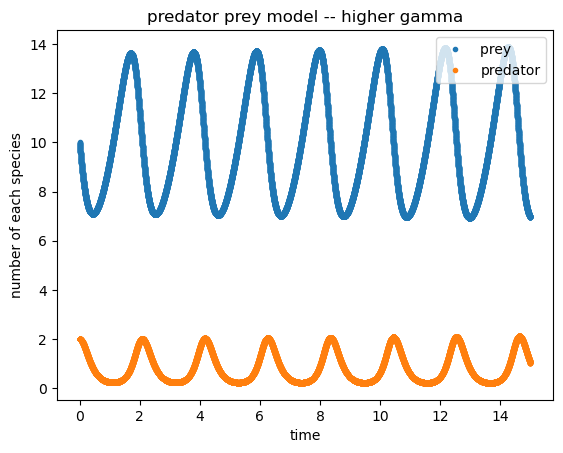

In [112]:
# changing gamma
# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 10. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- higher gamma")

Text(0.5, 1.0, 'predator prey model -- lower gamma')

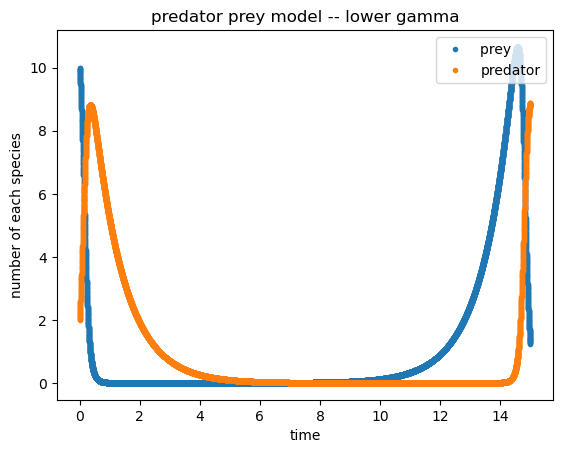

In [113]:
# changing gamma
# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 1. #predators
delta = 1. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- lower gamma")

The gamma value affects both the amount of the peaks and their intensities by specifically affecting the predator population. Smaller gamma values have less peaks, while larger gamma values have smaller predator populations.

Text(0.5, 1.0, 'predator prey model -- lower delta')

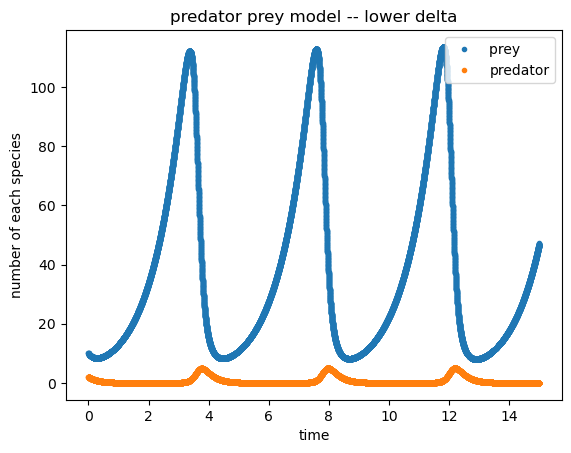

In [114]:
# changing delta
# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 0.1 #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- lower delta")

Text(0.5, 1.0, 'predator prey model -- higher delta')

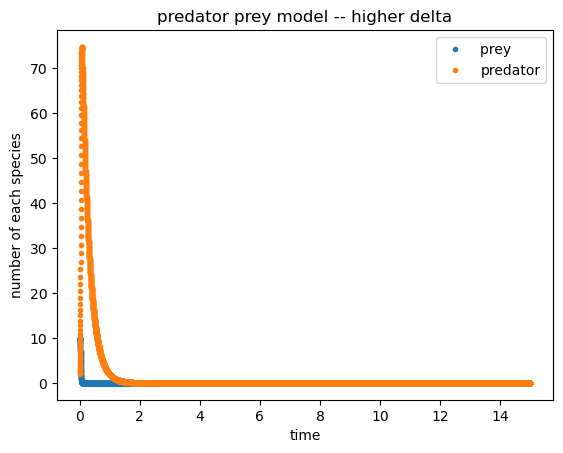

In [116]:
# changing delta
# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 10. #predators

# code to test the prediction:

# initial conditions (initial populations):
x0 = 10. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- higher delta")

The higher delta value causes a much higher population of predators, which ultimately crashes the model. The lower delta value dereases the population of the predator and has smaller peaks in their population.

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

In [117]:

def p(u):
    """Returns the rate of change of species
    ** includes a new differential parameter
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), (-y*(gamma - delta*x))-alpha*y**2])

Text(0.5, 1.0, 'predator prey model -- including delf-eating')

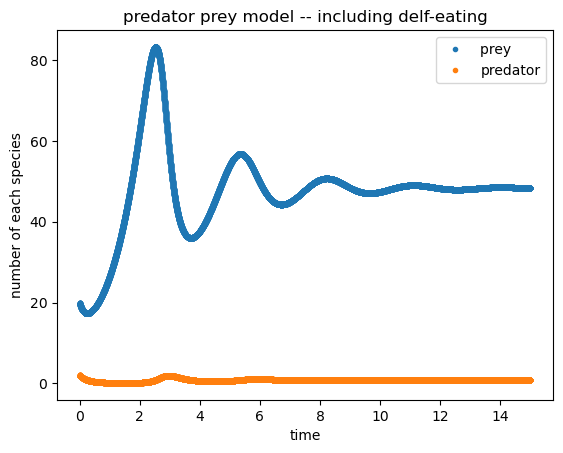

In [119]:
# code to test the prediction:

# set the parameters
alpha = 1  #prey growth rate (default=1)
beta = 1.2 #prey
gamma = 4. #predators
delta = 0.1 #predators

# initial conditions (initial populations):
x0 = 20. # 10=initial prey amount
y0 = 2. # 2=initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], p, dt)

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model -- including delf-eating")

Including self-eating in the equation, the predator population stays pretty low despite lots of prey. The predator population has reduce spikes to coincide with the spikes in the prey population.